C:\Users\HTM-I5\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\HTM-I5\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


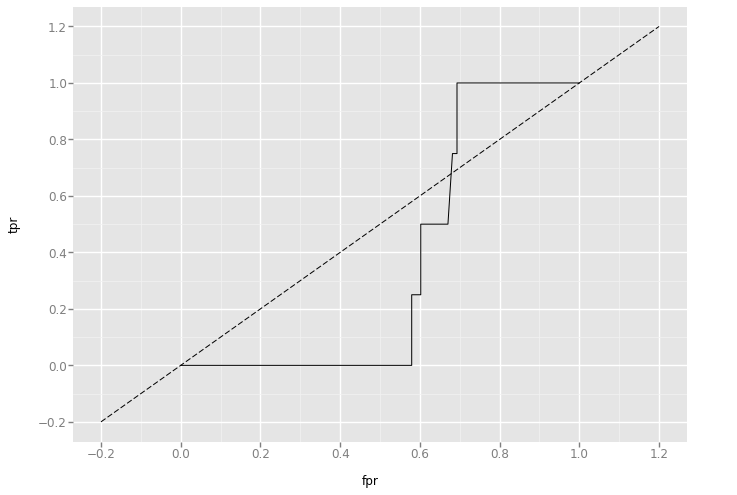

<ggplot: (35479988558)>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import xlsxwriter
from sklearn import metrics
from ggplot import *
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# Parameters
server = 'localhost'
db = 'D4R_VOICE'

# Create the connection
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_Connection=yes')

# query db
sql_full_data_sms = """
SELECT        TOP (100) PERCENT dbo.Table_antep_trabzon_sakarya_events.event, dbo.[Dataset 1_SMS_RAW].date, COUNT(dbo.[Dataset 1_SMS_RAW].NUMBER_OF_REFUGEE_SMS) AS adet
FROM            dbo.[Dataset 1_SMS_RAW] INNER JOIN
                         dbo.Base_Station_Location ON dbo.[Dataset 1_SMS_RAW].OUTGOING_SITE_ID = dbo.Base_Station_Location.BTS_ID FULL OUTER JOIN
                         dbo.Table_antep_trabzon_sakarya_events ON dbo.[Dataset 1_SMS_RAW].date = dbo.Table_antep_trabzon_sakarya_events.date AND 
                         dbo.Base_Station_Location.MX_SAHAIL = dbo.Table_antep_trabzon_sakarya_events.city
GROUP BY dbo.Base_Station_Location.MX_SAHAIL, dbo.Table_antep_trabzon_sakarya_events.event, dbo.[Dataset 1_SMS_RAW].date
HAVING        (dbo.Base_Station_Location.MX_SAHAIL = 'TRABZON')
"""

df_sms_full = pd.read_sql(sql_full_data_sms, conn)


################################
xtrainyetmis_sms_full=df_sms_full['adet'].fillna(method="pad").head(int(len(df_sms_full)*0.7)) 
xtestotuz_sms_full=df_sms_full['adet'].fillna(method="pad").tail(int(len(df_sms_full)*0.3))
ytrainyetmis_sms_full=df_sms_full['event'].fillna(value=0).head(int(len(df_sms_full)*0.7)) 
ytestotuz_sms_full=df_sms_full['event'].fillna(value=0).tail(int(len(df_sms_full)*0.3))

################################

X, y = make_classification(n_samples=(int(len(df_sms_full)*0.7))  + (int(len(df_sms_full)*0.3)) , n_features=10, n_classes=2, n_informative=5)
Xtrain_sms_full = xtrainyetmis_sms_full.reshape(-1, 1)
Xtest_sms_full = xtestotuz_sms_full.reshape(-1, 1)
ytrain_sms_full = ytrainyetmis_sms_full
ytest_sms_full = ytestotuz_sms_full

clf = LinearRegression(normalize=True) #normalize=true is best for data
clf.fit(Xtrain_sms_full, ytrain_sms_full)

###############################

preds = clf.predict(Xtest_sms_full)
fpr, tpr, _ = metrics.roc_curve(ytest_sms_full, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
 geom_line() +\
 geom_abline(linetype='dashed')